# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Reading from dataset

In [2]:
df=pd.read_csv('mainSimulationAccessTraces.csv')

In [3]:
df.shape

(357952, 13)

In [4]:
df.dtypes

sourceID                     object
sourceAddress                object
sourceType                   object
sourceLocation               object
destinationServiceAddress    object
destinationServiceType       object
destinationLocation          object
accessedNodeAddress          object
accessedNodeType             object
operation                    object
value                        object
timestamp                     int64
normality                    object
dtype: object

In [5]:
df.isnull().sum()

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType              148
operation                       0
value                        2050
timestamp                       0
normality                       0
dtype: int64

In [6]:
df.head(10)

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal
5,tempin2,/agent2/tempin2,/sensorService,BedroomParents,/agent2/tempin2,/sensorService,BedroomParents,/agent2/tempin2,/sensorService,registerService,none,1520031603464,normal
6,movement2,/agent2/movement2,/movementSensor,BedroomParents,/agent2/movement2,/movementSensor,BedroomParents,/agent2/movement2,/movementSensor,registerService,none,1520031603474,normal
7,tempin4,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,registerService,none,1520031603474,normal
8,tempin1,/agent1/tempin1,/sensorService,BedroomChildren,/agent1/tempin1,/sensorService,BedroomChildren,/agent1/tempin1,/sensorService,registerService,none,1520031603484,normal
9,movement1,/agent1/movement1,/movementSensor,BedroomChildren,/agent1/movement1,/movementSensor,BedroomChildren,/agent1/movement1,/movementSensor,registerService,none,1520031604212,normal


# Data Preprocessing

In [7]:
df['accessedNodeType'] = df['accessedNodeType'].fillna(value='/Malicious')

In [8]:
df['value'].fillna(value='30.0',inplace=True)
df.loc[df['value']=='FALSE',"value"] = '0.0'
df.loc[df['value']=='false',"value"] = '0.0'
df.loc[df['value']=='TRUE',"value"] = '1.0'
df.loc[df['value']=='true',"value"] = '1.0'
df.loc[df['value']=='twenty',"value"] = '20.0'
df.loc[df['value']=='none',"value"] = '0.0'
df.loc[df['value']=='0',"value"]='0.0'

In [9]:
df.head(10)

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,0.0,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,0.0,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,0.0,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,0.0,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,0.0,1520031603464,normal
5,tempin2,/agent2/tempin2,/sensorService,BedroomParents,/agent2/tempin2,/sensorService,BedroomParents,/agent2/tempin2,/sensorService,registerService,0.0,1520031603464,normal
6,movement2,/agent2/movement2,/movementSensor,BedroomParents,/agent2/movement2,/movementSensor,BedroomParents,/agent2/movement2,/movementSensor,registerService,0.0,1520031603474,normal
7,tempin4,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,registerService,0.0,1520031603474,normal
8,tempin1,/agent1/tempin1,/sensorService,BedroomChildren,/agent1/tempin1,/sensorService,BedroomChildren,/agent1/tempin1,/sensorService,registerService,0.0,1520031603484,normal
9,movement1,/agent1/movement1,/movementSensor,BedroomChildren,/agent1/movement1,/movementSensor,BedroomChildren,/agent1/movement1,/movementSensor,registerService,0.0,1520031604212,normal


In [10]:
df.shape

(357952, 13)

In [11]:
df = df.drop(df.index[df['value'].str.contains("org.*")])


In [12]:
df['value'] = pd.to_numeric(df['value'],downcast="float")

In [13]:
df.dtypes

sourceID                      object
sourceAddress                 object
sourceType                    object
sourceLocation                object
destinationServiceAddress     object
destinationServiceType        object
destinationLocation           object
accessedNodeAddress           object
accessedNodeType              object
operation                     object
value                        float32
timestamp                      int64
normality                     object
dtype: object

In [14]:
df.dtypes

sourceID                      object
sourceAddress                 object
sourceType                    object
sourceLocation                object
destinationServiceAddress     object
destinationServiceType        object
destinationLocation           object
accessedNodeAddress           object
accessedNodeType              object
operation                     object
value                        float32
timestamp                      int64
normality                     object
dtype: object

In [15]:
df.drop(['timestamp'],axis=1,inplace=True)

# Frequency visualization

1.Source Type

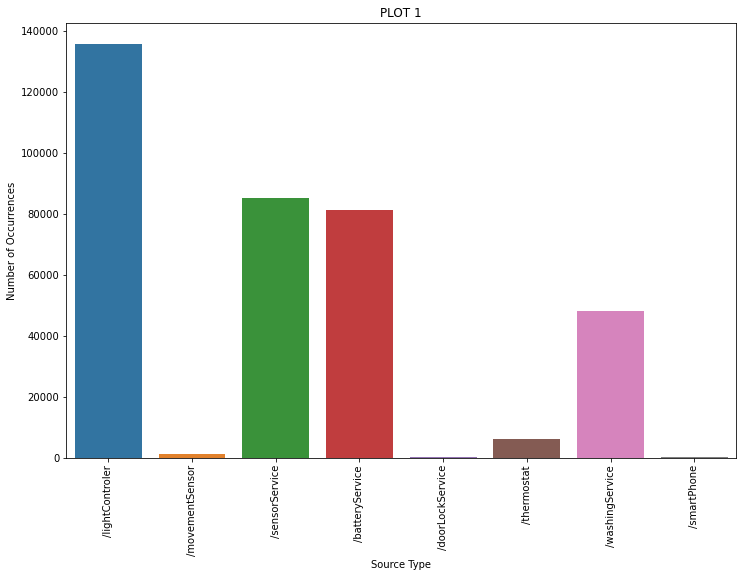

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x ='sourceType', data = df)
plt.title('PLOT 1')
plt.xlabel('Source Type')
plt.xticks(rotation=90)
plt.ylabel('Number of Occurrences')
plt.show()

In [17]:
tmp1 = df['sourceType'].value_counts()
for i,j in zip(tmp1.index,tmp1.values):
    print(i,j)


/lightControler 135775
/sensorService 85196
/batteryService 81267
/washingService 47986
/thermostat 5980
/movementSensor 1301
/doorLockService 330
/smartPhone 106


2.destinationServiceType

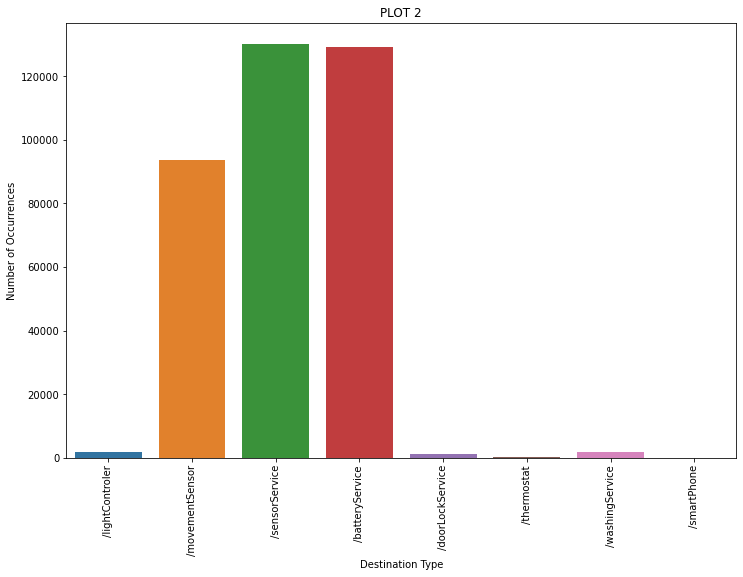

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x ='destinationServiceType', data = df)
plt.title('PLOT 2')
plt.xlabel('Destination Type')
plt.xticks(rotation=90)
plt.ylabel('Number of Occurrences')
plt.show()

In [19]:
tmp1 = df['destinationServiceType'].value_counts()
for i,j in zip(tmp1.index,tmp1.values):
    print(i,j)

/sensorService 130313
/batteryService 129119
/movementSensor 93645
/washingService 1805
/lightControler 1694
/doorLockService 1043
/thermostat 319
/smartPhone 3


3.sourceLocation

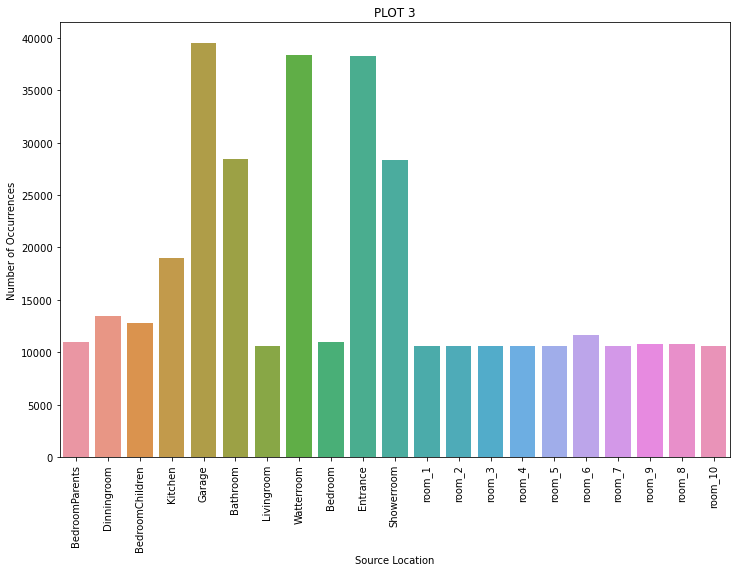

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(x ='sourceLocation', data = df)
plt.title('PLOT 3')
plt.xlabel('Source Location')
plt.xticks(rotation=90)
plt.ylabel('Number of Occurrences')
plt.show()

In [21]:
tmp1 = df['sourceLocation'].value_counts()
for i,j in zip(tmp1.index,tmp1.values):
    print(i,j)

Garage 39499
Watterroom 38368
Entrance 38217
Bathroom 28461
Showerroom 28315
Kitchen 18962
Dinningroom 13429
BedroomChildren 12836
room_6 11642
Bedroom 11009
BedroomParents 10946
room_8 10798
room_9 10752
Livingroom 10620
room_2 10606
room_1 10601
room_3 10597
room_5 10596
room_4 10572
room_7 10558
room_10 10557


4.destinationLocation

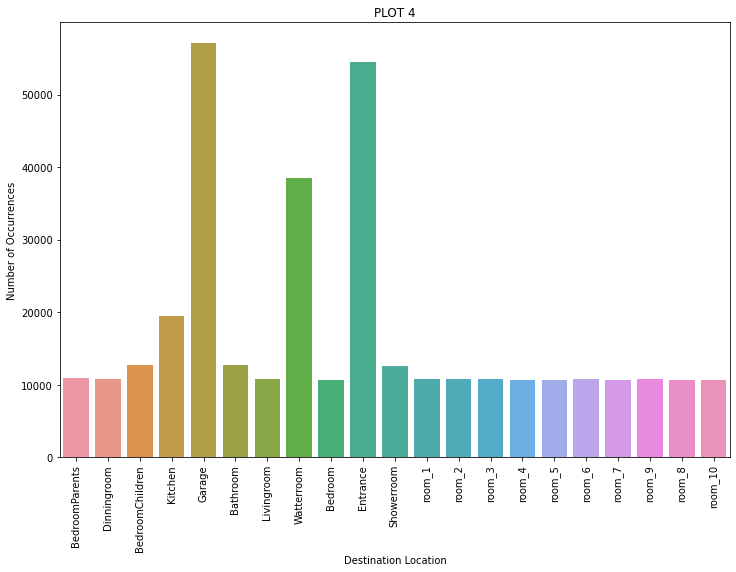

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x ='destinationLocation', data = df)
plt.title('PLOT 4')
plt.xlabel('Destination Location')
plt.xticks(rotation=90)
plt.ylabel('Number of Occurrences')
plt.show()

In [23]:
tmp1 = df['destinationLocation'].value_counts()
for i,j in zip(tmp1.index,tmp1.values):
    print(i,j)

Garage 57100
Entrance 54448
Watterroom 38524
Kitchen 19437
BedroomChildren 12768
Bathroom 12684
Showerroom 12583
BedroomParents 10938
room_9 10843
room_2 10828
room_1 10805
Livingroom 10781
Dinningroom 10759
room_6 10741
room_3 10732
room_4 10708
room_5 10687
room_8 10651
room_7 10649
room_10 10648
Bedroom 10627


5.Accessed Node

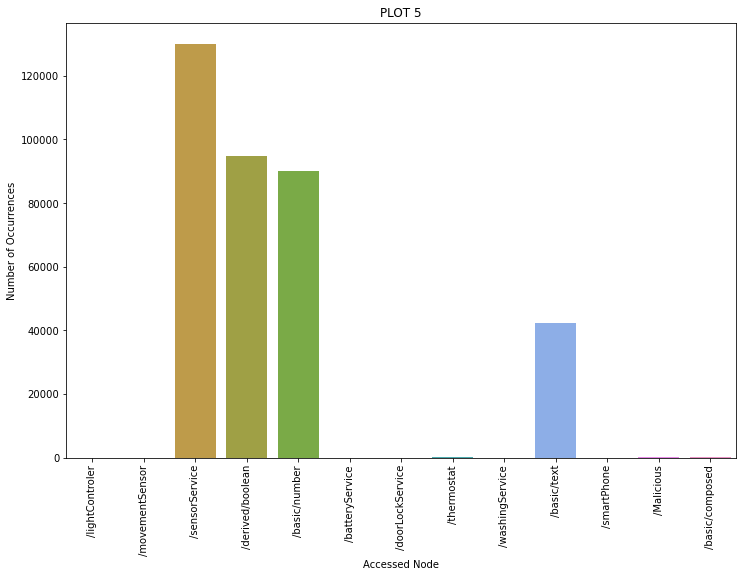

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x ='accessedNodeType', data = df)
plt.title('PLOT 5')
plt.xlabel('Accessed Node')
plt.xticks(rotation=90)
plt.ylabel('Number of Occurrences')
plt.show()

In [25]:
tmp1 = df['accessedNodeType'].value_counts()
for i,j in zip(tmp1.index,tmp1.values):
    print(i,j)

/sensorService 130155
/derived/boolean 94725
/basic/number 90010
/basic/text 42428
/thermostat 313
/Malicious 148
/basic/composed 100
/lightControler 23
/movementSensor 22
/batteryService 6
/doorLockService 5
/washingService 3
/smartPhone 3


6.operation

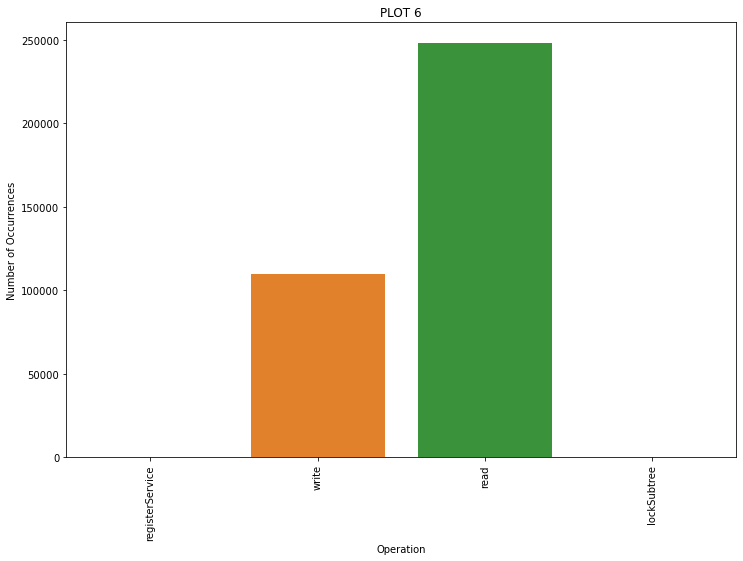

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x ='operation', data = df)
plt.title('PLOT 6')
plt.xlabel('Operation')
plt.xticks(rotation=90)
plt.ylabel('Number of Occurrences')
plt.show()

In [28]:
tmp1 = df['operation'].value_counts()
for i,j in zip(tmp1.index,tmp1.values):
    print(i,j)

read 248061
write 109648
lockSubtree 148
registerService 84


7.normality

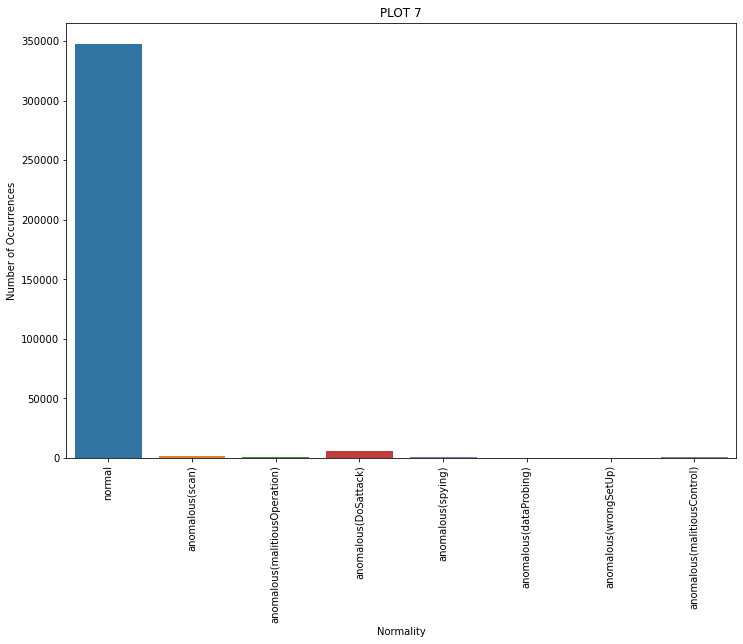

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(x ='normality', data = df)
plt.title('PLOT 7')
plt.xlabel('Normality')
plt.xticks(rotation=90)
plt.ylabel('Number of Occurrences')
plt.show()

In [31]:
tmp1 = df['normality'].value_counts()
for i,j in zip(tmp1.index,tmp1.values):
    print(i,j)

normal 347924
anomalous(DoSattack) 5780
anomalous(scan) 1547
anomalous(malitiousControl) 889
anomalous(malitiousOperation) 805
anomalous(spying) 532
anomalous(dataProbing) 342
anomalous(wrongSetUp) 122


# Label encoding of dataset

In [32]:
df.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,0.0,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,0.0,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,0.0,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,0.0,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,0.0,normal


In [33]:
dff=df

In [34]:
le0 = LabelEncoder()
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()
le9 = LabelEncoder()
le10 = LabelEncoder()
le11 = LabelEncoder()

In [35]:
a0 = dff.iloc[:,0].values
a1 = dff.iloc[:,1].values
a2 = dff.iloc[:,2].values
a3 = dff.iloc[:,3].values
a4 = dff.iloc[:,4].values
a5 = dff.iloc[:,5].values
a6 = dff.iloc[:,6].values
a7 = dff.iloc[:,7].values
a8 = dff.iloc[:,8].values
a9 = dff.iloc[:,9].values
a10 = dff.iloc[:,10].values
a11 = dff.iloc[:,11].values

In [36]:
b0 = le0.fit_transform(a0)
b0 = b0.reshape(len(b0),1)
b1 = le1.fit_transform(a1)
b1 = b1.reshape(len(b1),1)
b2 = le2.fit_transform(a2)
b2 = b2.reshape(len(b2),1)
b3 = le3.fit_transform(a3)
b3 = b3.reshape(len(b3),1)
b4 = le4.fit_transform(a4)
b4 = b4.reshape(len(b4),1)
b5 = le5.fit_transform(a5)
b5 = b5.reshape(len(b5),1)
b6 = le6.fit_transform(a6)
b6 = b6.reshape(len(b6),1)
b7 = le7.fit_transform(a7)
b7 = b7.reshape(len(b7),1)
b8 = le8.fit_transform(a8)
b8 = b8.reshape(len(b8),1)
b9 = le9.fit_transform(a9)
b9 = b9.reshape(len(b9),1)
b10 = le10.fit_transform(a10)
b10 = b10.reshape(len(b10),1)
b11 = le11.fit_transform(a11)
b11 = b11.reshape(len(b11),1)

In [37]:
ls1 = np.concatenate((b11,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10),axis=1)

In [38]:
df_f = pd.DataFrame(ls1)
df_f.to_csv('DF_F.csv')

# Extra tree classifier for features

In [39]:
from sklearn.ensemble import ExtraTreesClassifier 

In [40]:
yy = df_f[0] 
xx = df_f.drop([0,1], axis = 1) 
xx.head()

,2,3,4,5,6,7,8,9,10,11
0,30,2,3,30,2,3,59,7,2,0
1,70,2,4,68,2,4,134,7,2,0
2,1,2,2,0,2,2,0,7,2,0
3,77,2,7,73,2,7,144,7,2,0
4,78,3,7,74,3,7,146,8,2,0


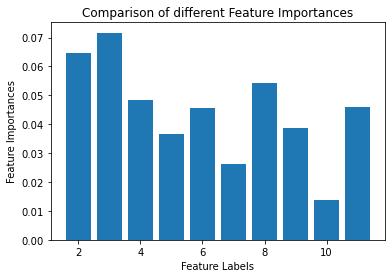

2  :  sourceAddress
3  :  sourceType
4  :  sourceLocation
5  :  destinationServiceAddress
6  :  destinationServiceType
7  :  destinationLocation
8  :  accessedNodeAddress
9  :  accessedNodeType
10  :  operation
11  :  value


In [41]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, 
                                        criterion ='entropy', max_features = 2) 
  
extra_tree_forest.fit(xx, yy) 

feature_importance = extra_tree_forest.feature_importances_ 
  

feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0) 

plt.bar(xx.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 

plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

ls=list(['sourceAddress','sourceType','sourceLocation','destinationServiceAddress','destinationServiceType','destinationLocation','accessedNodeAddress','accessedNodeType','operation','value'])
j=2
for i in ls:
    print(j,' : ',i)
    j+=1


# Correlation matrix

In [42]:

ls=list(['normality','sourceID','sourceAddress','sourceType','sourceLocation','destinationServiceAddress','destinationServiceType','destinationLocation','accessedNodeAddress','accessedNodeType','operation','value'])
j=0
for i in ls:
    print(j,' : ',i)
    j+=1
df_f.corr()

0  :  normality
1  :  sourceID
2  :  sourceAddress
3  :  sourceType
4  :  sourceLocation
5  :  destinationServiceAddress
6  :  destinationServiceType
7  :  destinationLocation
8  :  accessedNodeAddress
9  :  accessedNodeType
10  :  operation
11  :  value


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.077120,0.072743,-0.122909,0.104011,0.036372,-0.143250,0.111095,0.034445,0.002115,0.050980,-0.088497
1,0.077120,1.000000,0.149404,0.893599,0.083986,0.075886,0.216608,0.115455,0.073184,0.327313,0.564702,0.309827
2,0.072743,0.149404,1.000000,0.046137,-0.024444,0.986339,0.018062,0.077478,0.985857,0.054049,0.041830,0.039178
3,-0.122909,0.893599,0.046137,1.000000,-0.014888,-0.030632,0.119020,0.022234,-0.031913,0.160438,0.335866,0.195026
4,0.104011,0.083986,-0.024444,-0.014888,1.000000,-0.004445,0.304115,0.950527,-0.008459,0.284807,0.087429,0.160131
5,0.036372,0.075886,0.986339,-0.030632,-0.004445,1.000000,0.095871,0.095961,0.999852,0.115165,0.031934,0.078294
6,-0.143250,0.216608,0.018062,0.119020,0.304115,0.095871,1.000000,0.298067,0.098849,0.902069,0.309669,0.609895
7,0.111095,0.115455,0.077478,0.022234,0.950527,0.095961,0.298067,1.000000,0.092024,0.266725,0.089832,0.163357
8,0.034445,0.073184,0.985857,-0.031913,-0.008459,0.999852,0.098849,0.092024,1.000000,0.115288,0.027848,0.074962
9,0.002115,0.327313,0.054049,0.160438,0.284807,0.115165,0.902069,0.266725,0.115288,1.000000,0.450901,0.702457
